**Работу выполнили Сёмин Михаил и Корнийчук Павел**

# Градиентный спуск (GD)

#### Заклинание из любого курса матанализа: «градиент – это направление наискорейшего локального возрастания функции»

### Каждая новая точка выбирается по формуле 

#### $x_{k+1}=x_k - a\nabla f(x_{k})$

**Общий алгоритм градиентного спуска**

#### Расмотрим задачу линейной регрессии. Запишем её следующим образом:

$\large f(w)=\frac{1}{N} \sum_{i=1}^{N} (w^{T}x_{i} - y_{i})$

Вычисление градиента за $O(ND)$

# Стохастический градиентный спуск (SGD)

Функция потерь имеет вид суммы по отдельным парам объект-таргет и его градиент


$\large L(w, X, y)=\frac{1}{N} \sum_{i=1}^{N} L(w, x_{i}, y_{i})$
<br>
$\large \nabla_{w} L(w, X, y)=\frac{1}{N} \sum_{i=1}^{N} \nabla_{w} L(w, x_{i}, y_{i})$

#### Будем оценивать градиент с помощью семплирования, а не считать по всей выборке

$\large \nabla_{w} L(w, X, y)=\frac{1}{B} \sum_{i=1}^{B} \nabla_{w} L(w, x_{i}, y_{i})$

Подменили вычисление градиента по всей выборке вычислением по случайной подвыборке

Поскольку стохастические градиенты являются лишь оценками, SGD может быть шумным

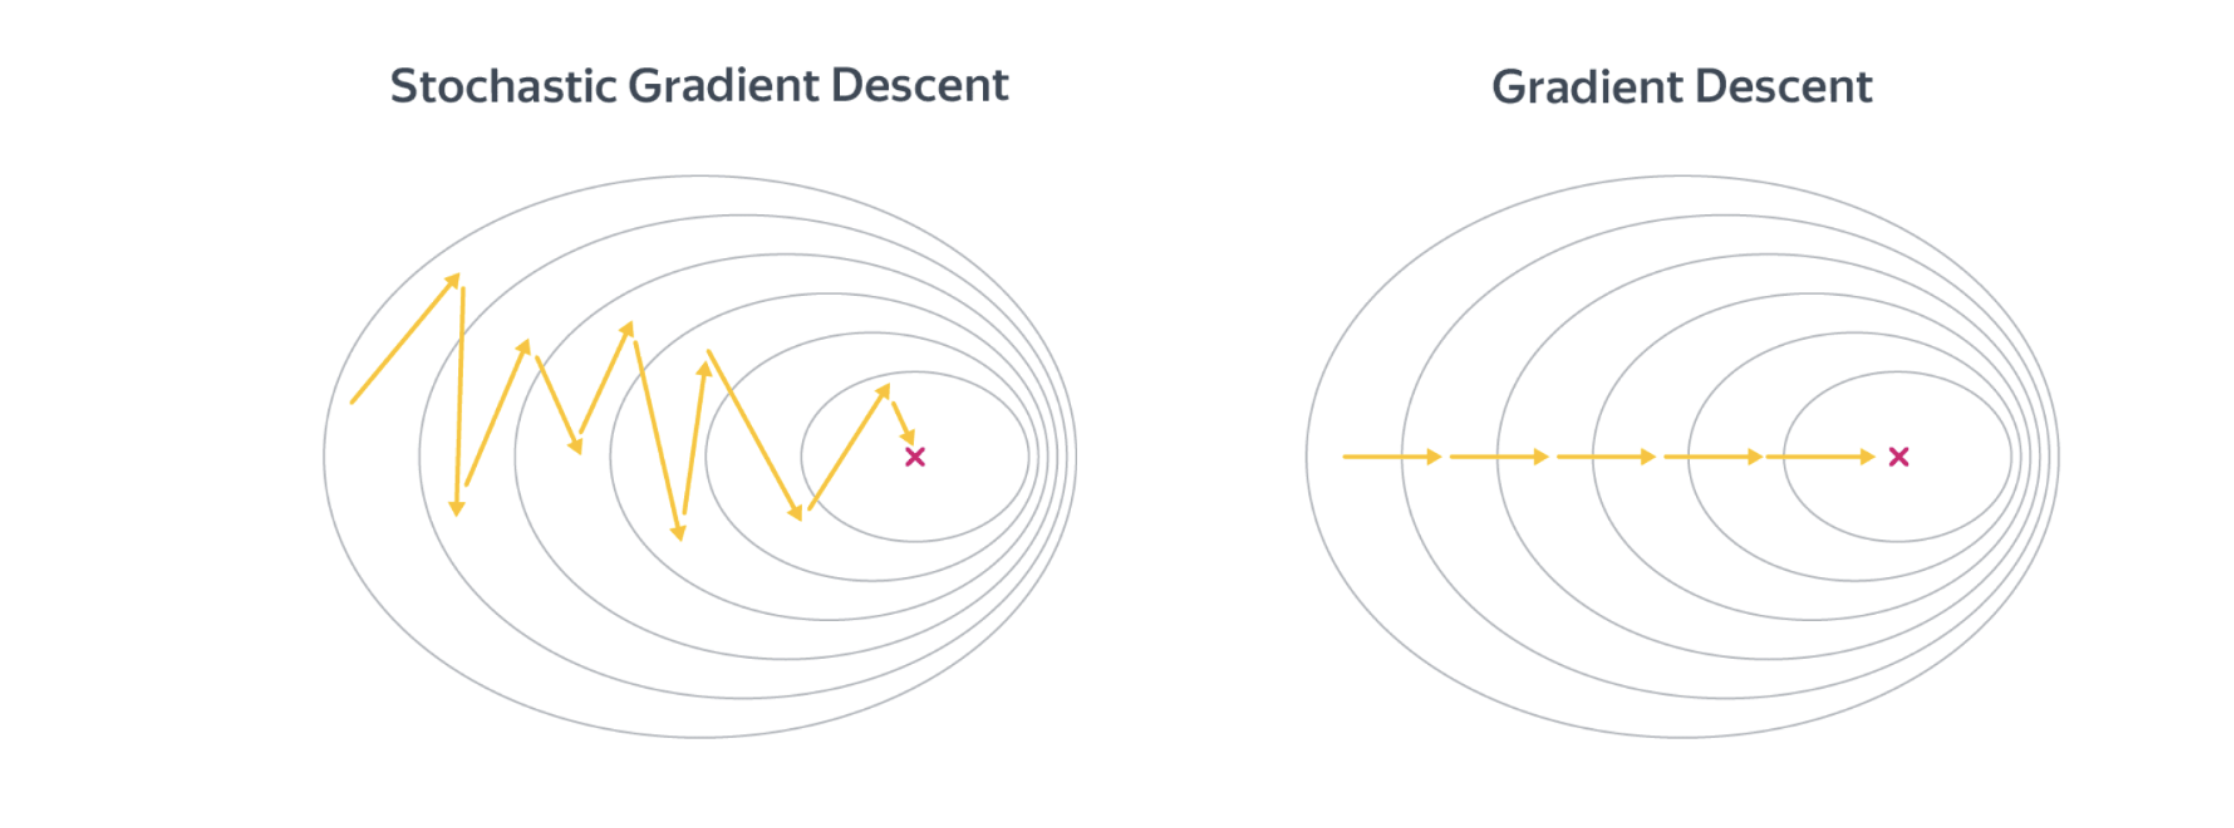

**Сложность по времени - $O(ND)$, по памяти можно добиться $O(BD)$**

# Продемонструем работу на данных о крушении Титаника

In [17]:
import pandas as pd
import numpy as np
import random as rnd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import SGDClassifier

In [18]:
train = pd.read_csv('/datasets/train.csv')
test = pd.read_csv('/datasets/test.csv')

In [19]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [20]:
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [21]:
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [22]:
train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000
